# Import Library

In [1]:
import pandas as pd
import numpy as np

# Read CSV File

Data is taken from Kaggle Open Data: https://www.kaggle.com/budincsevity/szeged-weather

In [62]:
path='E:\9. GitHub\weatherHistory2.csv'
w=pd.read_csv(path)
w.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Check Target

We define 'Summary' as target.

In [63]:
w['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

# Categorize Target

We categorize the target class for make target distribution of data more balanced.

In [64]:
def cloud_categorizer(row):
    row = str(row).lower()
    category = ""
    if "foggy" in row:
        category = 5
    elif "overcast" in row:
        category = 4
    elif "mostly cloudy" in row:
        category = 3
    elif "clear" in row:
        category = 1
    elif "partly cloudy" in row:
            category = 2
    else:
        category = 0
    return category
       
w["Summary_Group"] = w.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)
w["Summary_Group"].value_counts()

2    32290
3    28699
4    17177
1    10890
5     7187
0      210
Name: Summary_Group, dtype: int64

In [65]:
w.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Summary_Group
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,3


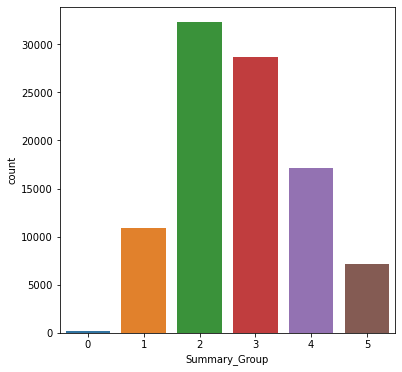

In [66]:
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 6, 6
sns.countplot(w['Summary_Group']) 

# Replace Missing Value on 'Precip Type'

In [67]:
w['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [68]:
w["Precip Type"].fillna("Unknown", inplace = True)  
w

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Summary_Group
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2


In [69]:
w['Precip Type'].unique()

array(['rain', 'snow', 'Unknown'], dtype=object)

# Categorize 'Precip Type' 

In [70]:
get_dummy={'rain':0, 'snow':1,'Unknown':2}
w['Precip Type']=w['Precip Type'].map(get_dummy)
w.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Summary_Group
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,3
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,3


# Drop Columns That will not be Processed

Drop 'Daily Summary' because i have Summary as a target.

Drop 'Loud Cover' as they only have 0 value.

Drop 'Formatted Date' because i didn't analyze by time. 

Drop 'Summary' because i have convert it to Summary_Group.

In [71]:
w=w.drop('Daily Summary',axis=1)
w=w.drop('Loud Cover',axis=1)
w=w.drop('Formatted Date',axis=1)
w=w.drop('Summary',axis=1)
w.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Group
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,3
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,3


In [72]:
w.corr()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Group
Precip Type,1.000000,-0.520381,-0.521781,0.214330,-0.057435,-0.038971,-0.307442,0.012511,0.178437
Temperature (C),-0.520381,1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447,-0.351283
Apparent Temperature (C),-0.521781,0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219,-0.347263
Humidity,0.214330,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454,0.374726
Wind Speed (km/h),-0.057435,0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263,0.063612
Wind Bearing (degrees),-0.038971,0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651,-0.024077
Visibility (km),-0.307442,0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818,-0.476806
Pressure (millibars),0.012511,-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000,0.080203
Summary_Group,0.178437,-0.351283,-0.347263,0.374726,0.063612,-0.024077,-0.476806,0.080203,1.000000


# Normalize Data

I choose Robust Scaler because it provides best accuracy for the model.

In [75]:
from sklearn.preprocessing import RobustScaler
w_robust=w.copy()
scaler = RobustScaler()
features = [['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
            'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
for feature in features:
    w_robust[feature] = scaler.fit_transform(w_robust[feature])
    
w_robust.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Group
0,0,-0.178642,-0.278992,0.379310,0.500000,0.408046,0.893035,-0.143634,2
1,0,-0.186887,-0.288739,0.275862,0.517442,0.454023,0.893035,-0.089227,2
2,0,-0.185316,-0.158655,0.379310,-0.726744,0.137931,0.758706,-0.055495,3
3,0,-0.262269,-0.366387,0.172414,0.498062,0.511494,0.893035,-0.004353,2
4,0,-0.229289,-0.303866,0.172414,0.129845,0.454023,0.893035,0.006529,3


# Split into Train Data and Test Data

In [76]:
x=w_robust.drop('Summary_Group',axis=1) 
y=w_robust.Summary_Group 
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

print ('Train set:', xTrain.shape,  yTrain.shape)
print ('Test set:', xTest.shape,  yTest.shape)

Train set: (67517, 8) (67517,)
Test set: (28936, 8) (28936,)


# Modeling - KNN

In [77]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [78]:
Ks=15
train_accuracy=np.zeros(Ks+1)
test_accuracy= np.zeros(Ks+1)
for i in range (1,Ks+1):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(xTrain,yTrain)
    yhat = neigh.predict(xTest)
    train_accuracy [i] = metrics.accuracy_score(yTrain, neigh.predict(xTrain))
    test_accuracy [i] = metrics.accuracy_score(yTest, yhat)
    print (i, round(train_accuracy [i]*100,2), round(test_accuracy [i]*100,2))

1 100.0 52.26
2 76.48 50.2
3 74.47 52.1
4 70.92 52.82
5 68.9 53.35
6 67.06 53.17
7 66.15 53.52
8 64.89 53.48
9 64.14 53.51
10 63.27 53.6
11 62.78 53.74
12 62.13 53.73
13 61.69 53.52
14 61.33 53.54
15 60.86 53.56


# Accuracy Model

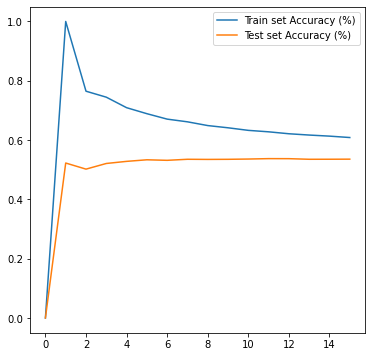

In [79]:
accu = {'Train set Accuracy (%)' : train_accuracy,
        'Test set Accuracy (%)' : test_accuracy}

accuracy= pd.DataFrame(accu, columns=['Train set Accuracy (%)','Test set Accuracy (%)'])
accuracy
accuracy.plot()

In [80]:
print ("Highest Train set Accuracy is ", round(train_accuracy.max()*100,2), "% with K=",np.argmax(train_accuracy))
print ("Highest Test set Accuracy is ", round(test_accuracy.max()*100,2), "% with K=", np.argmax(test_accuracy))

Highest Train set Accuracy is  100.0 % with K= 1
Highest Test set Accuracy is  53.74 % with K= 11


The model is overfit. I have tried drop columns which has minus correlation and applied imbalance data handling method: SMOTE but the Test set Accuracy is getting down.

If you have any suggestions, feel free to contact me to make the model even better! Thank you.